In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 1) 載入資料集

In [2]:
iris = load_iris()
df_train = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 2) EDA (Exploratory Data Analysis) 探索式資料分析
主要概念是透過數據統計的方式視覺化資料。做EDA的好處可以從各種面向先了解資料的狀況，以利後續的模型分析。

## 直方圖

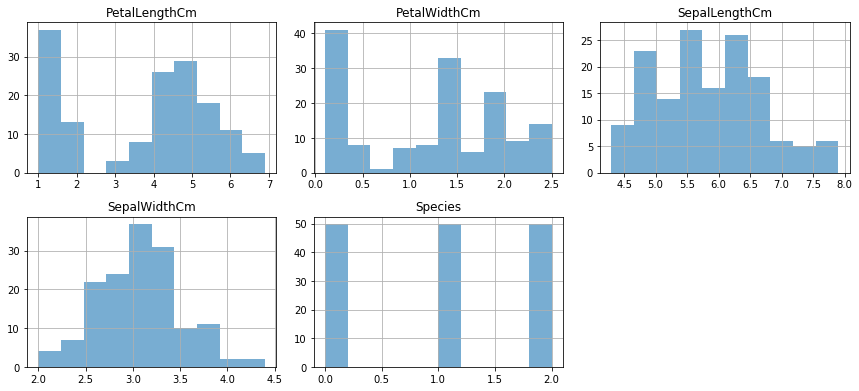

In [54]:
#直方圖 histograms
df_train.hist(alpha=0.6,layout=(3,3), figsize=(12, 8), bins=10) 
plt.tight_layout()
plt.show()

## 核密度估計Kernel Density Estimation(KDE)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ea9021bd0>,
      dtype=object)

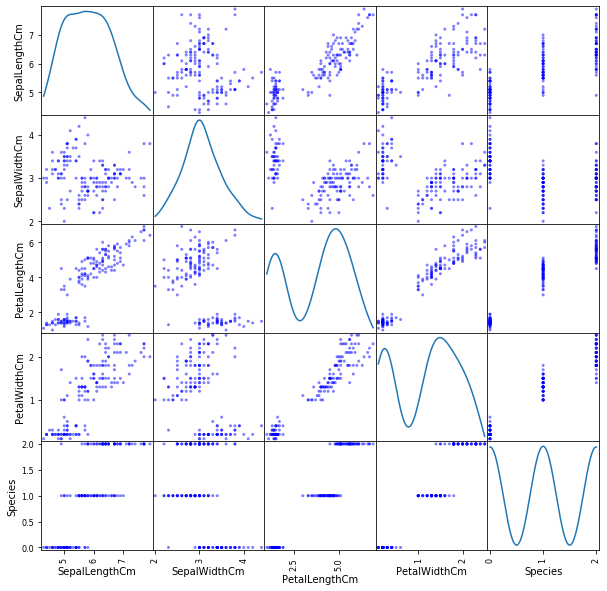

In [58]:
from pandas.plotting import scatter_matrix
scatter_matrix( df_train,figsize=(10, 10),color='b',diagonal='kde')

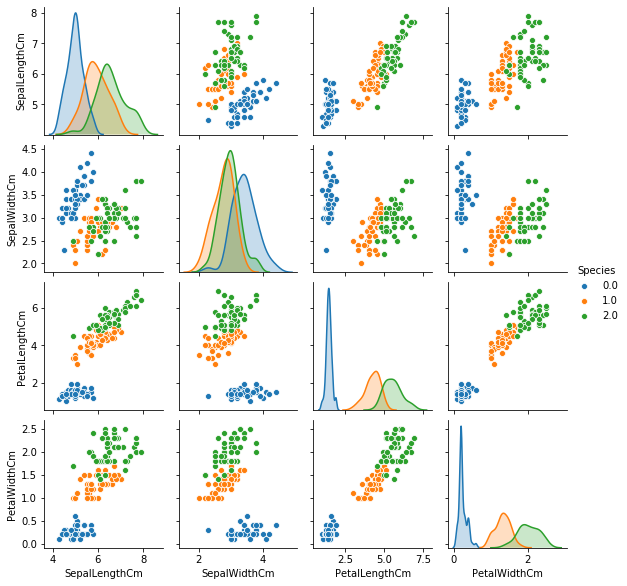

In [60]:
sns.pairplot(df_train, hue="Species", height=2, diag_kind="kde")

## 關聯分析 (correlation map)

In [61]:
df_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


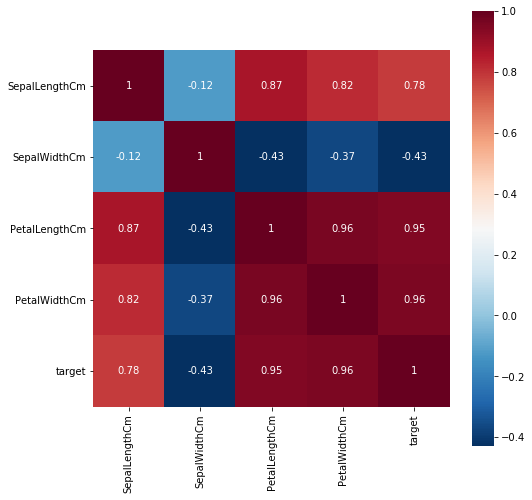

In [24]:
# correlation calculate
corr = df_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"

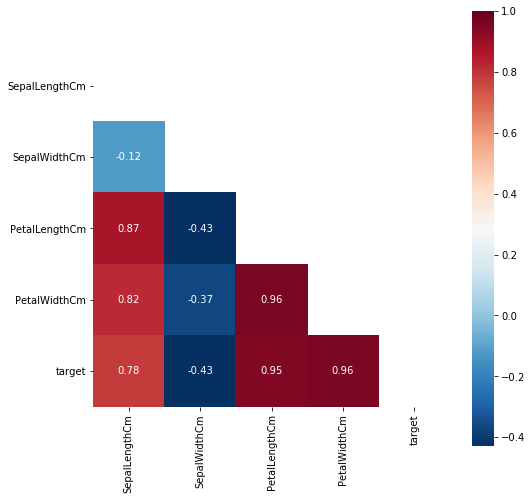

In [45]:
# correlation calculate
corr = df_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr()
# 將矩陣型簡化為對角矩陣型
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, mask=mask, cmap="RdBu_r") #center=0, cmap="YlGnBu"

## 散佈圖

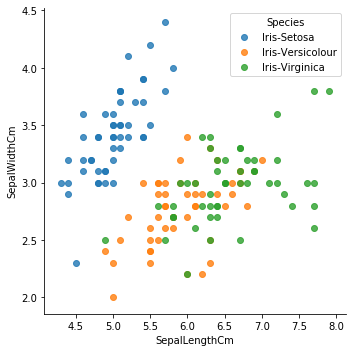

In [64]:
sns.lmplot("SepalLengthCm", "SepalWidthCm", hue='Species', data=df_train, fit_reg=False, legend=False)
plt.legend(title='Species', loc='upper right', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

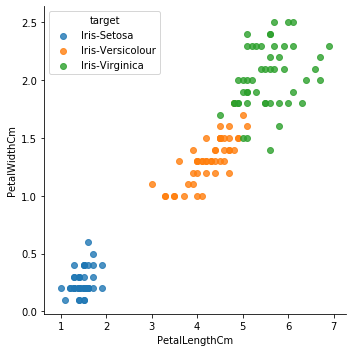

In [63]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Species', data=df_train, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

## 箱形圖
透過箱形圖可以分析每個特徵的分布狀況以及是否有離群值

Text(0.5, 1.0, 'Species')

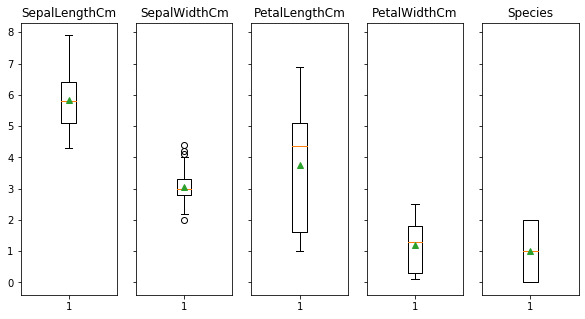

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,5), sharey=True)
axes[0].boxplot(df_train['SepalLengthCm'],showmeans=True)
axes[0].set_title('SepalLengthCm')

axes[1].boxplot(df_train['SepalWidthCm'],showmeans=True)
axes[1].set_title('SepalWidthCm')

axes[2].boxplot(df_train['PetalLengthCm'],showmeans=True)
axes[2].set_title('PetalLengthCm')

axes[3].boxplot(df_train['PetalWidthCm'],showmeans=True)
axes[3].set_title('PetalWidthCm')

axes[4].boxplot(df_train['Species'],showmeans=True)
axes[4].set_title('Species')




## 分布狀態

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


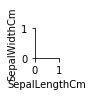

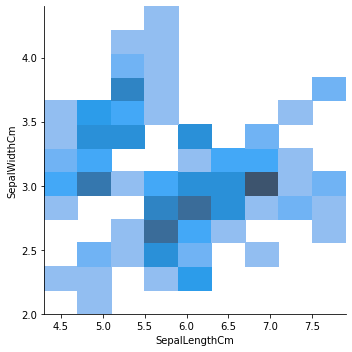

In [15]:
# sns.displot(data=df_train)
g = sns.FacetGrid(df_train, height=1)
g.map(sns.displot, "SepalLengthCm", "SepalWidthCm")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

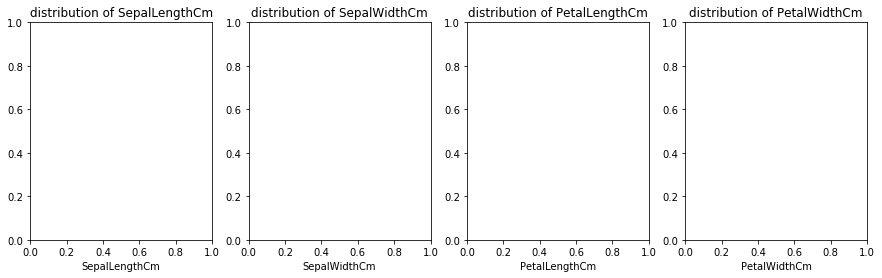

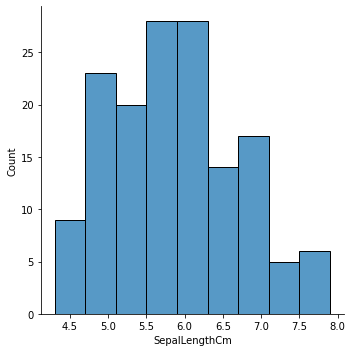

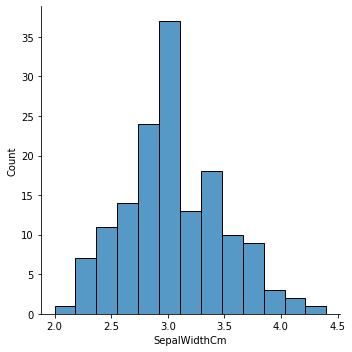

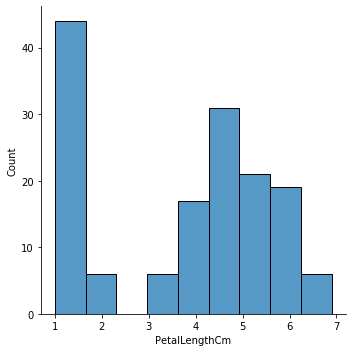

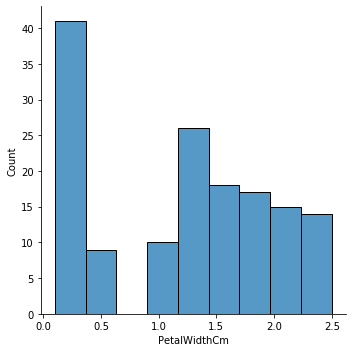

In [6]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.displot(df_train["SepalLengthCm"][:],ax=axes[0])
sns.displot(df_train["SepalWidthCm"][:],ax=axes[1])
sns.displot(df_train["PetalLengthCm"][:],ax=axes[2])
sns.displot(df_train["PetalWidthCm"][:],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")